# Analisis Exploratorio de Datos

#### Lectura de dataset:

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ruta del archivo ZIP
zip_file_path = "REGISTROS PELICULAS_NETFLIX.zip"
# Nombre del archivo Excel dentro del archivo ZIP
excel_file_name = "Netflix Dataset Latest 2021.xlsx"

# Extraer el archivo Excel del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(excel_file_name) as excel_file:
        # Leer el archivo Excel utilizando pandas
        netflix = pd.read_excel(excel_file)

In [2]:
#head para entender brevemente el dataset
netflix.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


## Información más detallada acerca de las columnas del dataset

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9255 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

## Breve descripción de las columnas

| Columna                | Descripción                                  | Tipo de Datos | Ejemplos de Valores                            |
|------------------------|----------------------------------------------|---------------|-----------------------------------------------|
| Title                  | Título de la película o serie               | str           | "Stranger Things", "The Crown", "Titanic"     |
| Genre                  | Género(s) de la película o serie            | str           | "Drama", "Comedy", "Action & Adventure"       |
| Tags                   | Etiquetas asociadas a la película o serie   | str           | "Suspense", "Romance", "Science Fiction"      |
| Languages              | Idiomas disponibles                          | str           | "English", "Spanish", "French"                |
| Series or Movie        | Tipo de contenido (Serie o Película)        | str           | "Series", "Movie"                             |
| Hidden Gem Score       | Puntuación de "Hidden Gem"                  | float         | 7.5, 8.2, 6.9                                 |
| Country Availability   | Países donde está disponible                 | str           | "United States", "United Kingdom", "Mexico"   |
| Runtime                | Duración de la película o serie              | str           | "120 minutes", "45 minutes", "2 hours"        |
| Director               | Director(es) de la película o serie          | str           | "Steven Spielberg", "Christopher Nolan"       |
| Writer                 | Guionista(s) de la película o serie         | str           | "Aaron Sorkin", "Quentin Tarantino"           |
| Actors                 | Actores principales                          | str           | "Leonardo DiCaprio, Tom Hanks, Meryl Streep"  |
| View Rating            | Clasificación de visualización               | str           | "R" (Restricted), "PG-13", "TV-MA"            |
| IMDb Score             | Puntuación en IMDb                           | float         | 8.5, 7.2, 6.8                                 |
| Rotten Tomatoes Score  | Puntuación en Rotten Tomatoes                | float         | 85, 90, 70                                    |
| Metacritic Score       | Puntuación en Metacritic                     | float         | 75, 80, 65                                    |
| Awards Received        | Número de premios recibidos                  | float         | 3, 10, 0                                      |
| Awards Nominated For   | Número de premios a los que fue nominado     | float         | 5, 8, 2                                       |
| Boxoffice              | Ingresos en taquilla                         | float         | 1000000, 50000000, 250000000                  |
| Release Date           | Fecha de lanzamiento en cines                | datetime      | "2020-07-15", "1997-12-19", "2015-03-03"      |
| Netflix Release Date   | Fecha de lanzamiento en Netflix              | datetime      | "2020-09-01", "2018-04-10", "2016-11-20"      |
| Production House       | Casa productora                              | str           | "Universal Pictures", "Warner Bros. Pictures" |
| Netflix Link           | Enlace a la página en Netflix                | str           | "https://www.netflix.com/title/80100172"      |
| IMDb Link              | Enlace a la página en IMDb                   | str           | "https://www.imdb.com/title/tt0944947/"       |
| Summary                | Resumen de la trama                          | str           | "A group of friends investigates strange occurrences"|
| IMDb Votes             | Votos recibidos en IMDb                      | float         | 50000, 100000, 250000                         |
| Image                  | Enlace a la imagen                           | str           | "https://example.com/image.jpg"               |
| Poster                 | Enlace al póster                             | str           | "https://example.com/poster.jpg"              |
| TMDb Trailer           | Enlace al tráiler en TMDb                    | str           | "https://example.com/trailer"                 |
| Trailer Site           | Sitio web del tráiler                        | str           | "YouTube", "Vimeo"                            |


In [4]:
print("Total filas dataset:",len(netflix))
print("Total Titulos diferentes en Netflix:",(len(netflix["Title"].unique())))
print("Total de géneros en Netflix:",(len(netflix["Genre"].unique())))
print("Total de idiomas en Netflix:",(len(netflix["Languages"].unique())))
print("Total de directores en Netflix:",(len(netflix["Director"].unique())))
print("Valores unicos de la columna Series or Movie:",(len(netflix["Series or Movie"].unique())))
print("Cantidad de paises donde esta disponible netflix:",(len(netflix["Country Availability"].unique())))
print("Diferentes Duraciones de tiempo de pelicula o series en netflix:",(len(netflix["Runtime"].unique())))
print("Diferentes escritores en netflix:",(len(netflix["Writer"].unique())))



Total filas dataset: 9425
Total Titulos diferentes en Netflix: 9166
Total de géneros en Netflix: 1532
Total de idiomas en Netflix: 1209
Total de directores en Netflix: 4253
Valores unicos de la columna Series or Movie: 2
Cantidad de paises donde esta disponible netflix: 5282
Diferentes Duraciones de tiempo de pelicula o series en netflix: 5
Diferentes escritores en netflix: 6525


In [5]:
print("A continuación un analisis descriptivo de la columna Hidden Gem Score")
netflix["Hidden Gem Score"].describe()

A continuación un analisis descriptivo de la columna Hidden Gem Score


count    9415.000000
mean        5.540733
std         2.447462
min         0.600000
25%         3.400000
50%         5.300000
75%         8.100000
max         9.800000
Name: Hidden Gem Score, dtype: float64

## Grafico Nube de Palabras para Generos de Netflix

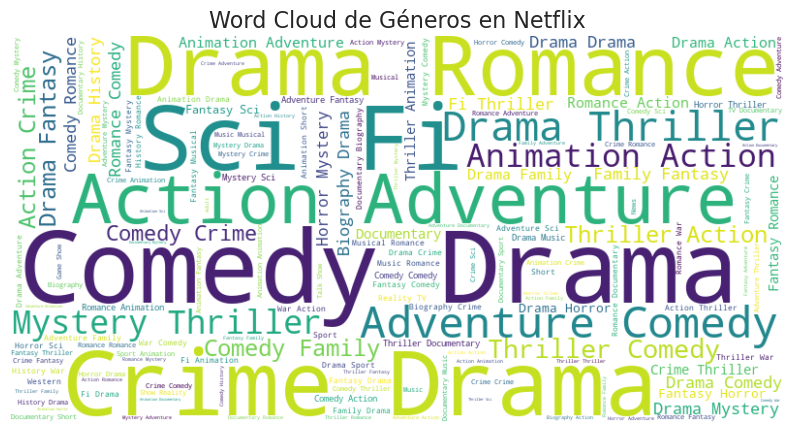

In [6]:
# Crear una copia del DataFrame para no modificar el original
netflix_copy = netflix.copy()
# Eliminar valores nulos en la columna 'Genre' si es necesario
netflix_copy.dropna(subset=['Genre'], inplace=True)
# Concatenar todos los géneros en una sola cadena
text = ' '.join(netflix_copy['Genre'])
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Configurar el estilo de Seaborn
sns.set()

# Mostrar la nube de palabras utilizando Seaborn
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Géneros en Netflix', fontsize=16)
plt.show()

# !Separacion en dummies de la columna Genre, se vera tambien como queda sino hacemos la columna en dummies

In [7]:
netflix_copy = netflix
Genre_dummies = netflix_copy['Genre'].str.get_dummies(sep=', ')
# Concatenar los datos dummy al DataFrame original
netflix_copy = pd.concat([netflix_copy, Genre_dummies], axis=1)
# Eliminar la columna original 'Actors'
netflix_copy.drop(columns=['Genre'], inplace=True)
netflix_copy.to_csv("netflix_genre.csv")


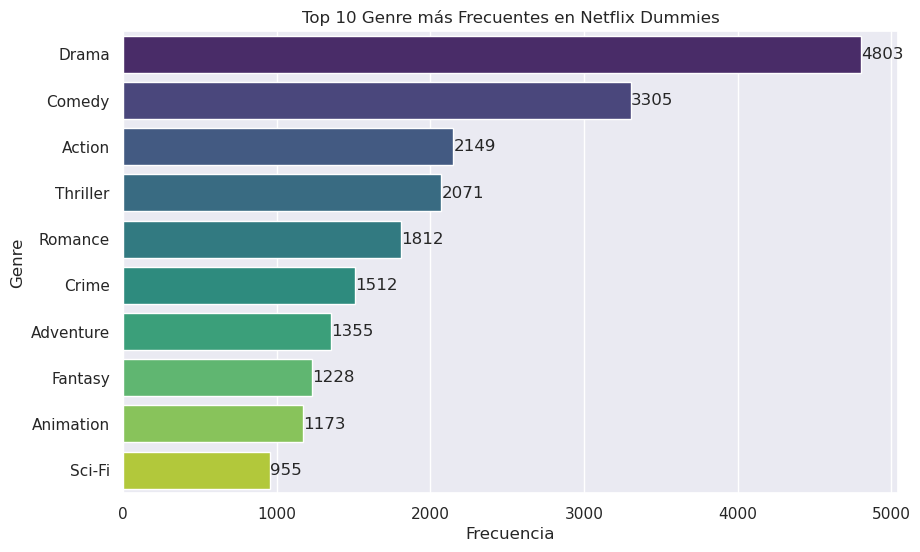

In [8]:
Genre_freq = Genre_dummies.sum().sort_values(ascending=False)

# Tomar los diez actores más frecuentes
top_10_actors = Genre_freq.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis')

# Agregar los valores de conteo en las barras
for i, v in enumerate(top_10_actors.values):
    plt.text(v + 0.2, i, str(v), ha='left', va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Genre')
plt.title('Top 10 Genre más Frecuentes en Netflix Dummies')
plt.show()

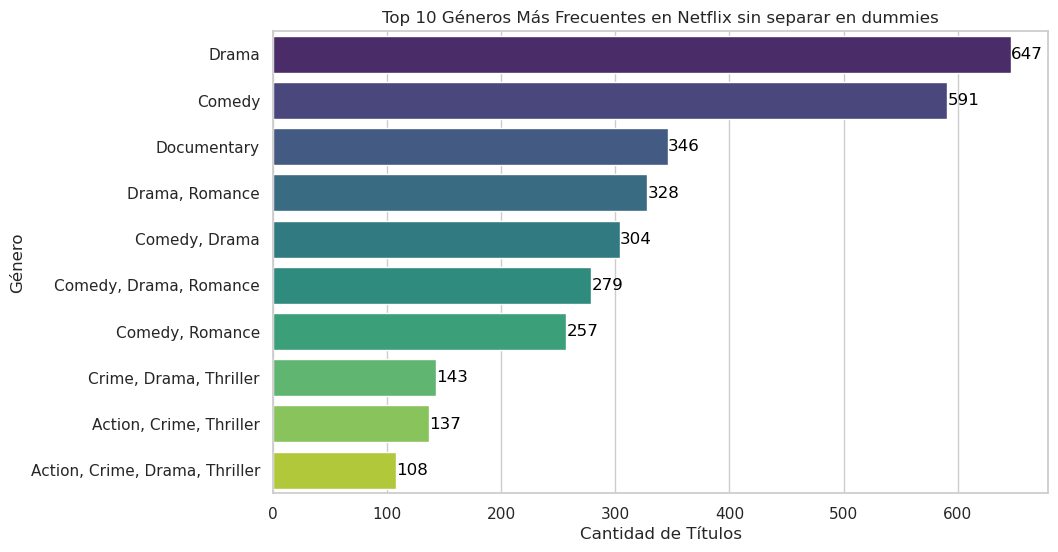

In [9]:
# Obtener los 10 géneros más frecuentes en Netflix
netflix_copy = netflix
top_ten_genres = netflix_copy['Genre'].value_counts().nlargest(10)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_ten_genres.values, y=top_ten_genres.index, palette='viridis')
plt.title('Top 10 Géneros Más Frecuentes en Netflix sin separar en dummies')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género')

# Agregar etiquetas de valores en las barras
for index, value in enumerate(top_ten_genres.values):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')

plt.show()


## Se llega a la conclusion que para obtener valores certeros debemos normalizar o separa la columna Genre y cualquier otra anidada

## Grafico de Nube de Palabras para "etiquetas" de netflix

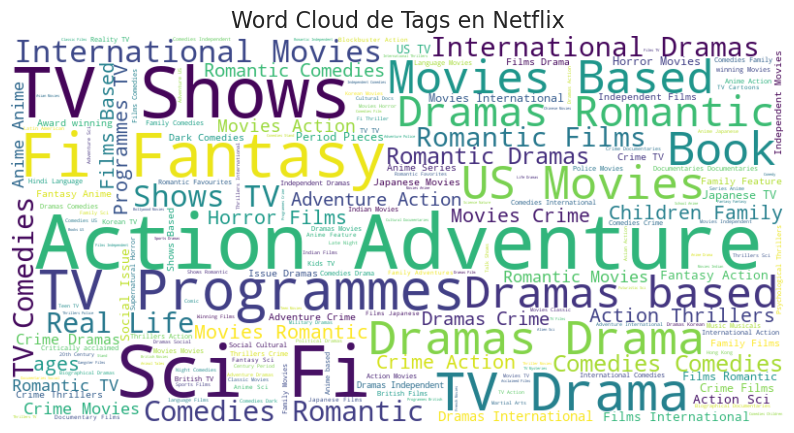

In [10]:
# Crear una copia del DataFrame para no modificar el original
netflix_copy = netflix.copy()

# Eliminar valores nulos en la columna 'Tags' si es necesario
netflix_copy.dropna(subset=['Tags'], inplace=True)

# Concatenar todos los tags en una sola cadena
text = ' '.join(netflix_copy['Tags'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Configurar el estilo de Seaborn
sns.set()

# Mostrar la nube de palabras utilizando Seaborn
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Tags en Netflix', fontsize=16)
plt.show()


## TOP TEN Directores en Netflix

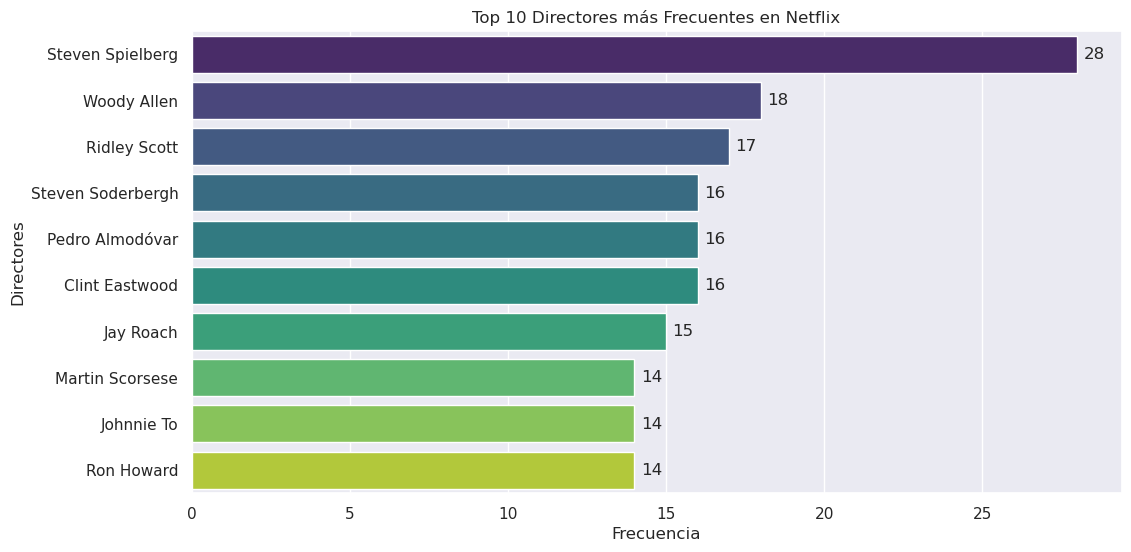

In [11]:
# Crear una copia del DataFrame para no modificar el original
netflix_copy = netflix.copy()

# Eliminar valores nulos en la columna 'Director' si es necesario
netflix_copy.dropna(subset=['Director'], inplace=True)

# Contar la frecuencia de cada director
director_counts = netflix_copy['Director'].value_counts().head(10)  # Tomar solo los 10 directores más frecuentes

# Configurar el estilo de Seaborn
sns.set()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis')

# Agregar los valores de conteo en las barras
for i, v in enumerate(director_counts.values):
    plt.text(v + 0.2, i, str(v), ha='left', va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Directores')
plt.title('Top 10 Directores más Frecuentes en Netflix')
plt.show()


# !Separación de Actors en dummies

#### Se detecta que la columna de actores contiene a varios actores en la misma columna con un separador por comas, para este grafico se crean dummies, se agregaran tambien al dataset para que no se haga tan pesado

In [ ]:
netflix_copy = netflix
actors_dummies = netflix_copy['Actors'].str.get_dummies(sep=', ')
# Concatenar los datos dummy al DataFrame original
netflix_copy = pd.concat([netflix_copy, actors_dummies], axis=1)
# Eliminar la columna original 'Actors'
netflix_copy.drop(columns=['Actors'], inplace=True)
netflix_copy['Title'] = netflix_copy['Title'].astype(str)
netflix_copy.to_parquet('netflix_actors.parquet', index=False)

In [34]:
netflix_copy['TMDb Trailer'] = netflix_copy['TMDb Trailer'].astype(str)
netflix_copy.to_parquet('netflix_actors.parquet', index=False)

## Top Ten Actores en Netflix

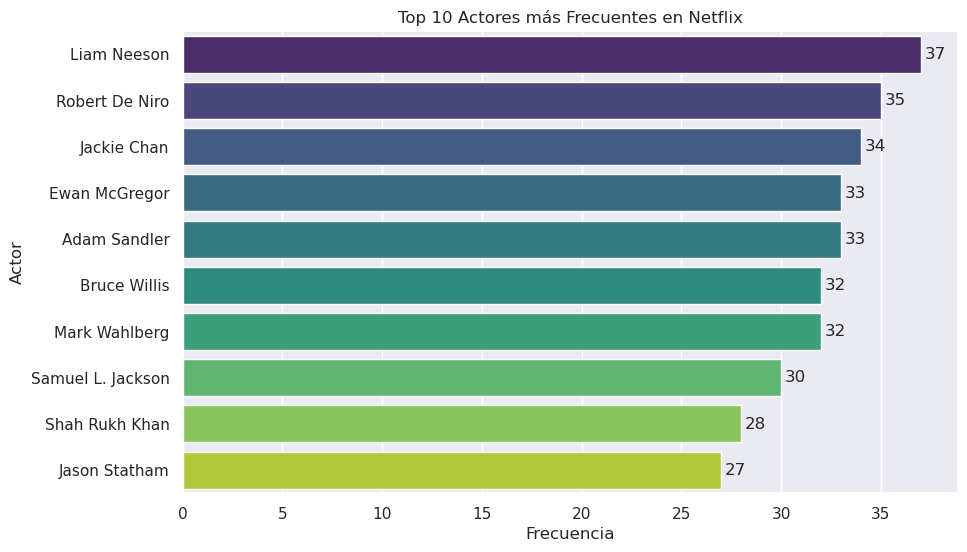

In [14]:
actor_freq = actors_dummies.sum().sort_values(ascending=False)

# Tomar los diez actores más frecuentes
top_10_actors = actor_freq.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis')

# Agregar los valores de conteo en las barras
for i, v in enumerate(top_10_actors.values):
    plt.text(v + 0.2, i, str(v), ha='left', va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Actor')
plt.title('Top 10 Actores más Frecuentes en Netflix')
plt.show()

# !Separación de Languges en dummies

#### Se detecta que la columna de languages contiene a varios idiomas en la misma columna con un separador por comas, para este grafico se crean dummies, se agregaran tambien al dataset para que no se haga tan pesado

In [15]:
netflix_copy = netflix
languages_dummies = netflix_copy['Languages'].str.get_dummies(sep=', ')
# Concatenar los datos dummy al DataFrame original
netflix_copy = pd.concat([netflix_copy, languages_dummies], axis=1)
# Eliminar la columna original 'Languages'
netflix_copy.drop(columns=['Languages'], inplace=True)
netflix_copy.to_csv("netflix_language.csv")
netflix_copy.head()

,Title,Genre,Tags,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,...,Urdu,Uzbek,Vietnamese,Wayuu,Welsh,Wolof,Xhosa,Yiddish,Yoruba,Zulu
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",...,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",...,0,0,0,0,0,0,0,0,0,0
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",...,0,0,0,0,0,0,0,0,0,0
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",...,0,0,0,0,0,0,0,0,0,0
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",...,0,0,0,0,0,0,0,0,0,0


## Top Ten de idiomas en Netflix

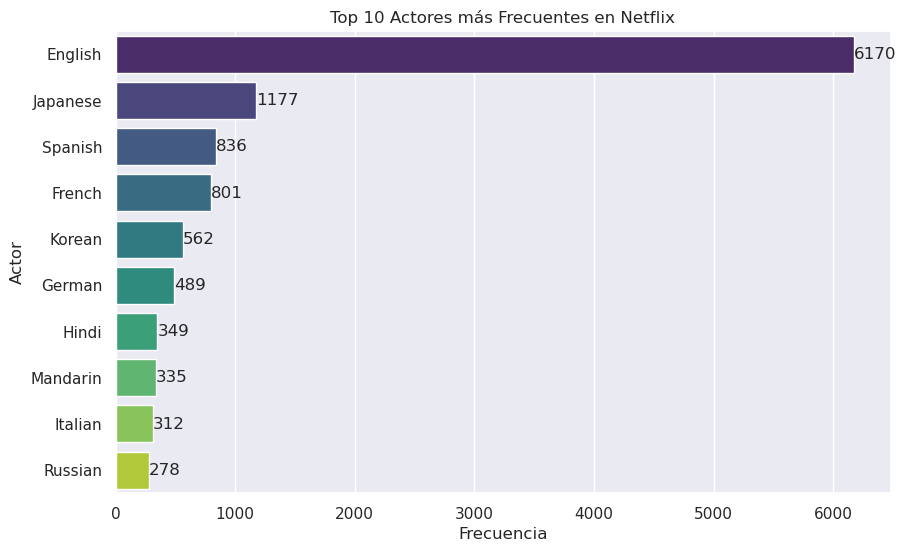

In [16]:
languages_freq = languages_dummies.sum().sort_values(ascending=False)

# Tomar los diez actores más frecuentes
top_10_actors = languages_freq.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis')

# Agregar los valores de conteo en las barras
for i, v in enumerate(top_10_actors.values):
    plt.text(v + 0.2, i, str(v), ha='left', va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Actor')
plt.title('Top 10 Actores más Frecuentes en Netflix')
plt.show()

## Analisis comparativo de cantidad de peliculas y series de netflix por año

In [17]:
netflix['Release Date'].describe()

count                             9217
mean     2010-09-14 00:48:44.682651648
min                1913-10-27 00:00:00
25%                2007-08-03 00:00:00
50%                2014-10-10 00:00:00
75%                2018-01-03 00:00:00
max                2021-11-12 00:00:00
Name: Release Date, dtype: object

## Comparativo de Series vs Movies

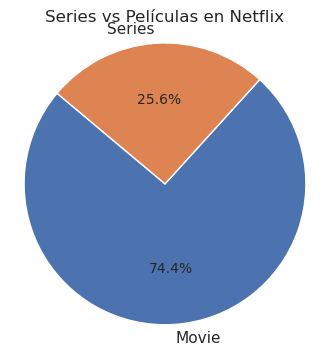

In [18]:
# Contar los valores únicos en la columna 'Series or Movie'
series_movie_counts = netflix['Series or Movie'].value_counts()

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de torta
plt.rcParams.update({'font.size': 10})  # Tamaño de fuente ajustado
plt.figure(figsize=(4, 4))
plt.pie(series_movie_counts, labels=series_movie_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Series vs Películas en Netflix')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurarse de que la torta sea circular
plt.show()

## Cantidad de peliculas y series lanzadas en netflix por año

<Figure size 1400x800 with 0 Axes>

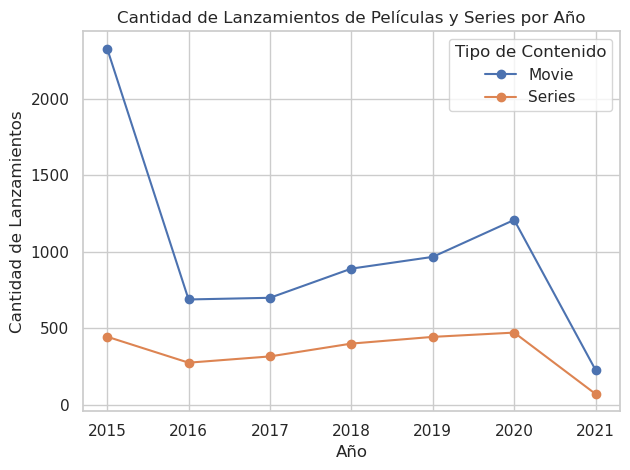

In [19]:
# Paso 1: Convertir 'Release Date' en datetime si aún no lo está
netflix['Netflix Release Date'] = pd.to_datetime(netflix['Netflix Release Date'])

# Paso 2: Extraer el año de 'Release Date'
netflix['Year'] = netflix['Netflix Release Date'].dt.year

# Paso 3: Contar el número de lanzamientos por año y tipo de contenido
release_count = netflix.groupby(['Year', 'Series or Movie']).size().unstack(fill_value=0)

# Paso 4: Crear el gráfico de líneas con un tamaño de figura más grande
plt.figure(figsize=(14, 8))

release_count.plot(kind='line', marker='o')

plt.title('Cantidad de Lanzamientos de Películas y Series por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.legend(title='Tipo de Contenido')

plt.grid(True)  # Agregar cuadrícula al gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


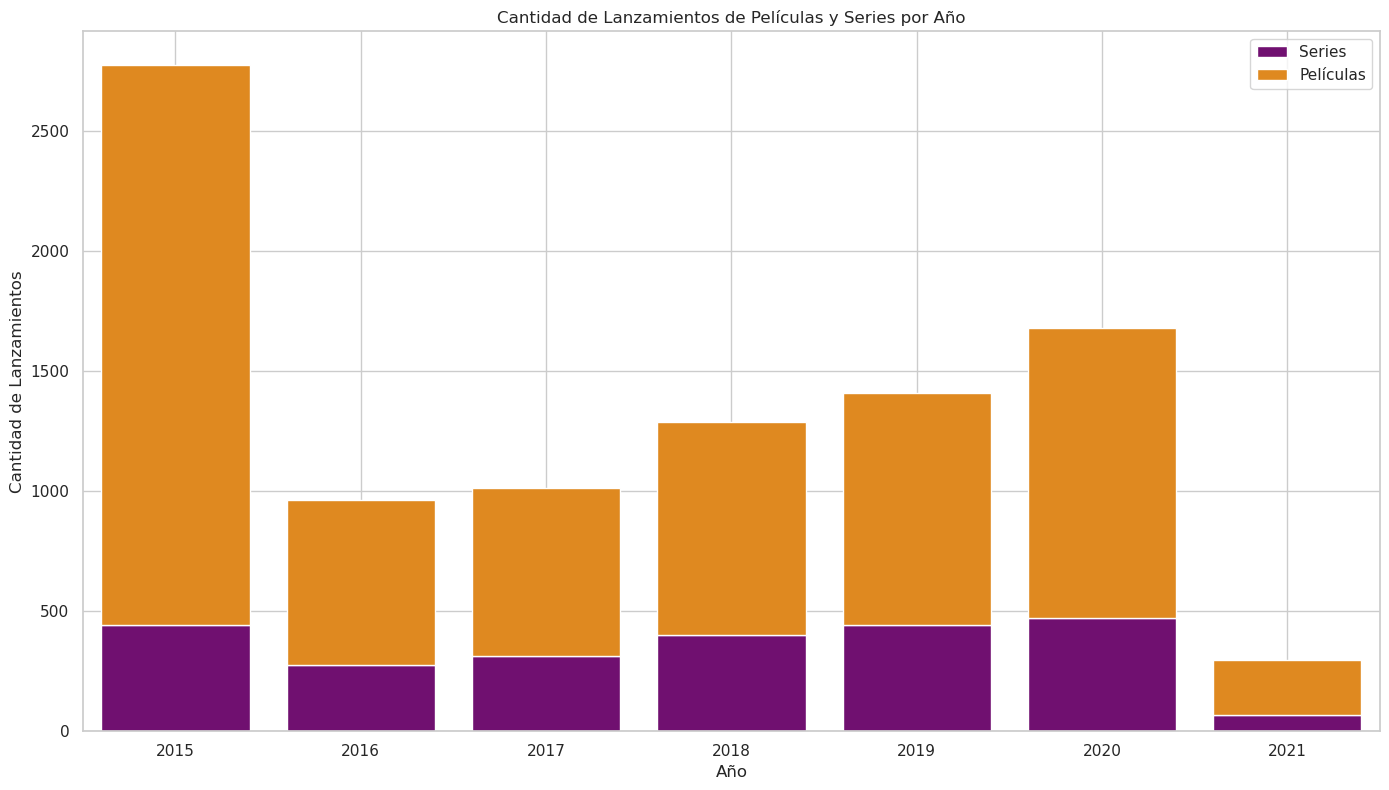

In [20]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de barras verticales con Seaborn
plt.figure(figsize=(14, 8))

# Barras para Series
sns.barplot(x=release_count.index, y=release_count['Series'], color='purple', label='Series')

# Barras para Películas
sns.barplot(x=release_count.index, y=release_count['Movie'], color='darkorange', bottom=release_count['Series'], label='Películas')

plt.title('Cantidad de Lanzamientos de Películas y Series por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.grid(True)  # Agregar cuadrícula al gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.legend()  # Mostrar la leyenda
plt.show()


# Frecuencias de tiempo de peliculas o series en netflix

### Frecuencia de tiempo entre peliculas y series

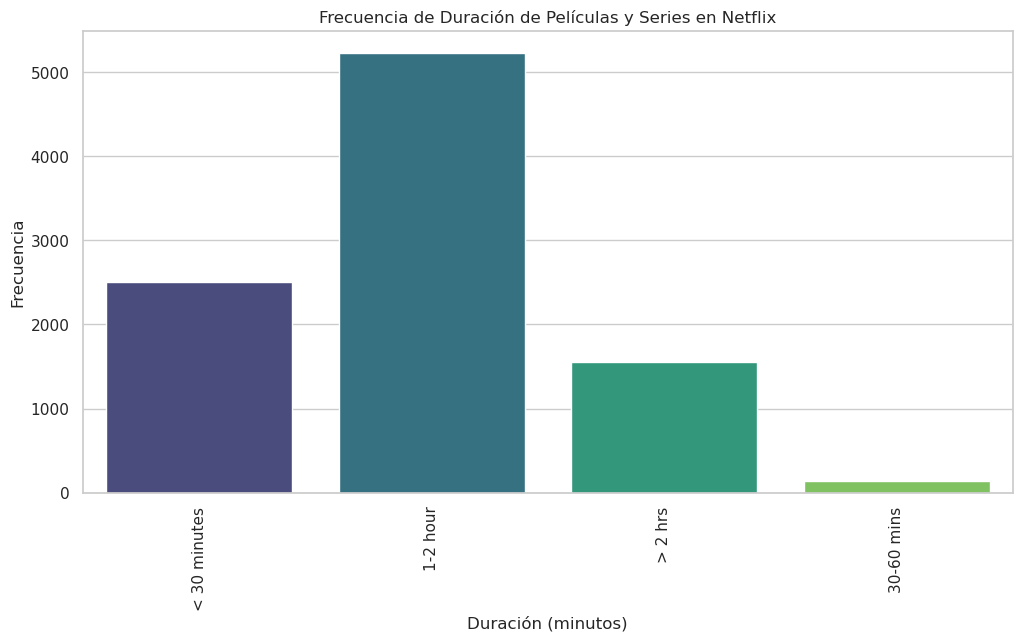

In [21]:
# Filtrar los valores nulos en la columna "runtime" si es necesario
netflix_filtered = netflix.dropna(subset=['Runtime'])

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_filtered, x='Runtime', palette='viridis')
plt.title('Frecuencia de Duración de Películas y Series en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()


## Duracion de series en netflix

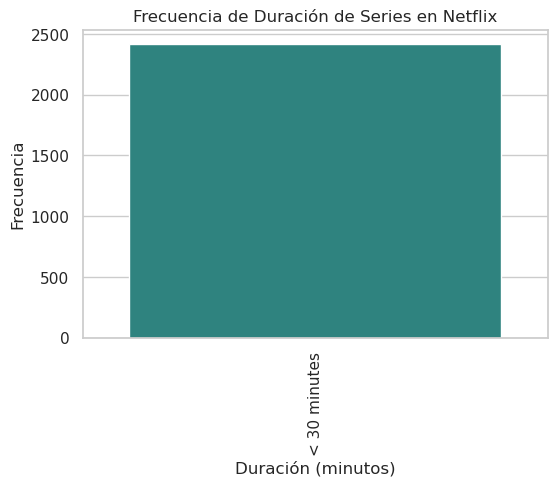

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los valores nulos en la columna "runtime" si es necesario
netflix_series = netflix[netflix['Series or Movie'] == 'Series']

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=netflix_series, x='Runtime', palette='viridis')
plt.title('Frecuencia de Duración de Series en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()


## Duracion de peliculas en netflix

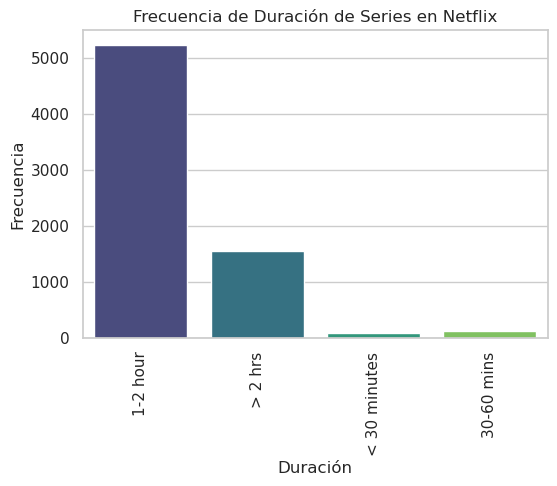

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los valores nulos en la columna "runtime" si es necesario
netflix_series = netflix[netflix['Series or Movie'] == 'Movie']

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=netflix_series, x='Runtime', palette='viridis')
plt.title('Frecuencia de Duración de Series en Netflix')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()


## Resumen de trama en nube de palabras

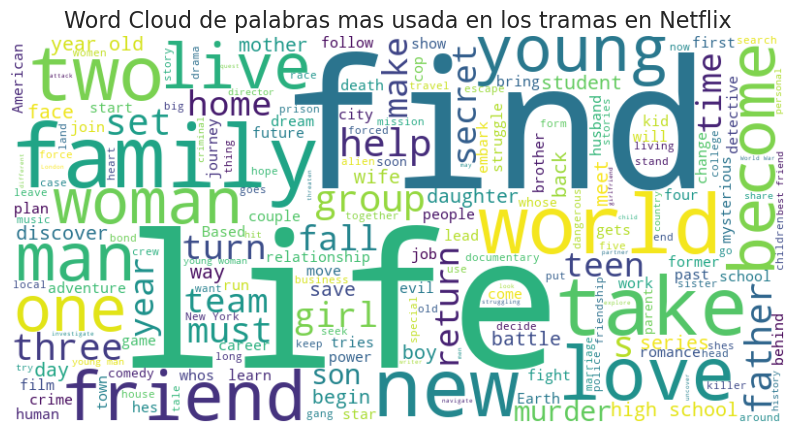

In [24]:
# Crear una copia del DataFrame para no modificar el original
netflix_copy = netflix.copy()

# Eliminar valores nulos en la columna 'Tags' si es necesario
netflix_copy.dropna(subset=['Summary'], inplace=True)

# Concatenar todos los tags en una sola cadena
text = ' '.join(netflix_copy['Summary'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Configurar el estilo de Seaborn
sns.set()

# Mostrar la nube de palabras utilizando Seaborn
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de palabras mas usada en los tramas en Netflix', fontsize=16)
plt.show()


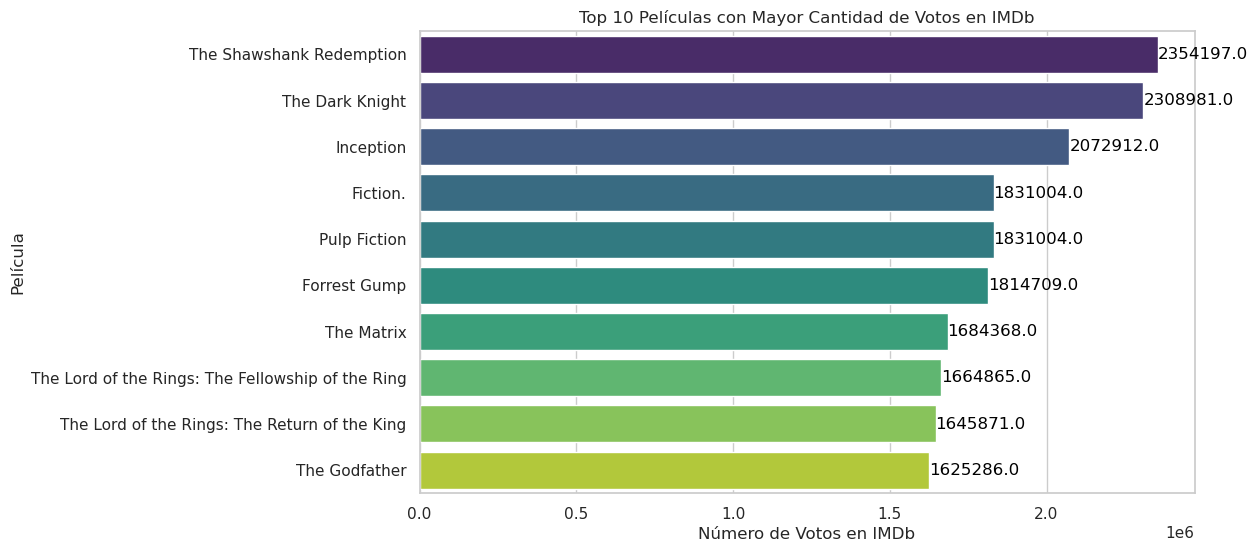

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las diez películas con los mayores valores en la columna "IMDb Votes"
top_ten = netflix.nlargest(10, 'IMDb Votes')

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='IMDb Votes', y='Title', data=top_ten, palette='viridis')
plt.title('Top 10 Películas con Mayor Cantidad de Votos en IMDb')
plt.xlabel('Número de Votos en IMDb')
plt.ylabel('Película')

# Agregar etiquetas de valores en las barras
for index, value in enumerate(top_ten['IMDb Votes']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')

plt.show()


## Series o peliculas con mayor "Hiden Gem Score"

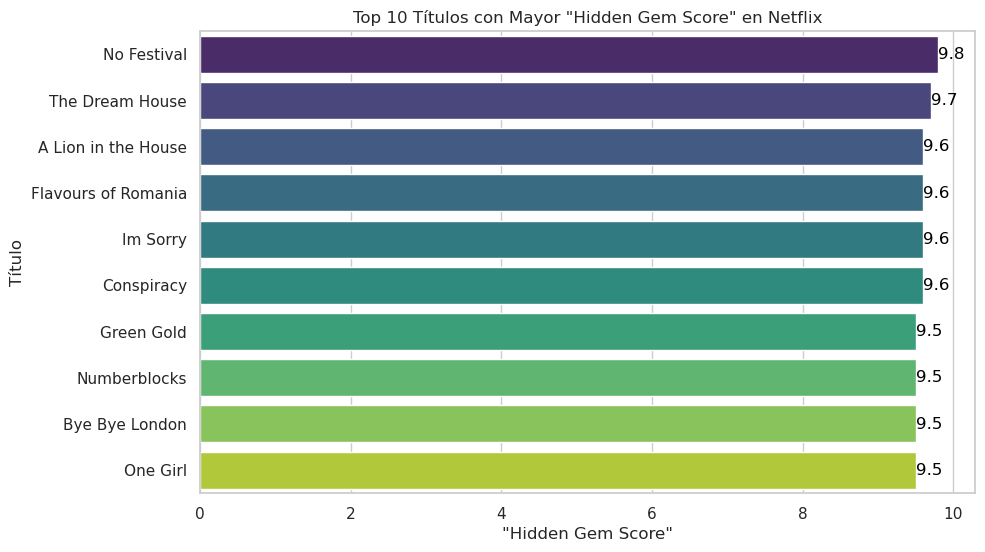

In [26]:
# Obtener los diez títulos con los mayores valores en la columna "Hidden Gem Score"
top_ten_hidden_gem = netflix.nlargest(10, 'Hidden Gem Score')

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Hidden Gem Score', y='Title', data=top_ten_hidden_gem, palette='viridis')
plt.title('Top 10 Títulos con Mayor "Hidden Gem Score" en Netflix')
plt.xlabel('"Hidden Gem Score"')
plt.ylabel('Título')

# Agregar etiquetas de valores en las barras
for index, value in enumerate(top_ten_hidden_gem['Hidden Gem Score']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')

plt.show()


In [27]:
## Nube de palabras de rating

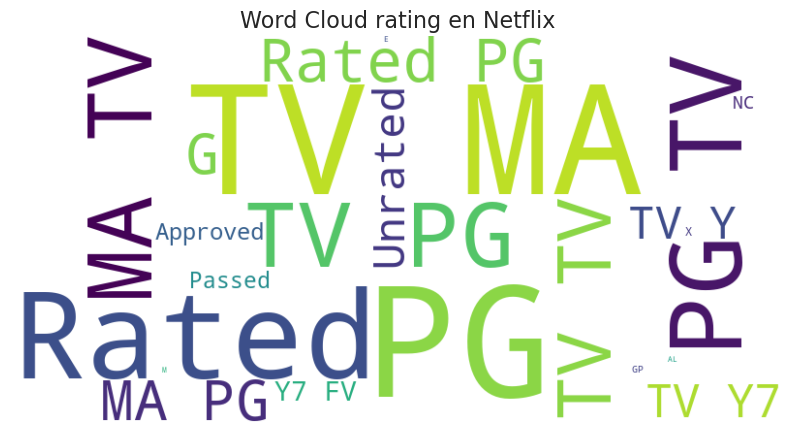

In [28]:
# Crear una copia del DataFrame para no modificar el original
netflix_copy = netflix.copy()

# Eliminar valores nulos en la columna 'Tags' si es necesario
netflix_copy.dropna(subset=['View Rating'], inplace=True)

# Concatenar todos los tags en una sola cadena
text = ' '.join(netflix_copy['View Rating'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Configurar el estilo de Seaborn
sns.set()

# Mostrar la nube de palabras utilizando Seaborn
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud rating en Netflix', fontsize=16)
plt.show()
